In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from tqdm import tqdm
import cv2
import os
import seaborn as sns
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True) 

Build and train CNN model on case 1: Real images only

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.regularizers import l2
import numpy as np
import os
import cv2

def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=l2(0.001)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu', kernel_regularizer=l2(0.001)), 
        Dropout(0.6),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

base_dir = 'C:/brain_tumor/version2/notebook/Training'
class_names = ['glioma', 'meningioma', 'pituitary']

X = []
y = []

for label, class_name in enumerate(class_names):
    class_dir = os.path.join(base_dir, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (128, 128))
        X.append(img)
        y.append(label)

X = np.array(X)
y = np.array(y)

X = X.astype('float32') / 255.0

# Case 1 Original Images
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = create_cnn_model(X_train.shape[1:], len(class_names))
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), batch_size=4)

In [ ]:
model.save('cnn_case_1.h5')

In [ ]:
# plot accuracy and loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Build and train CNN model on case 2: Real images and data augmentation methods

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.regularizers import l2

def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=l2(0.001)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.6),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

base_dir = 'C:/brain_tumor/version2/notebook/Training'
class_names = ['glioma', 'meningioma', 'pituitary']

X = []
y = []

for label, class_name in enumerate(class_names):
    class_dir = os.path.join(base_dir, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (128, 128))
        X.append(img)
        y.append(label)

X = np.array(X)
y = np.array(y)

X = X.astype('float32') / 255.0

# Data augmentation setup
datagen = ImageDataGenerator(horizontal_flip=True, height_shift_range=0.2, zoom_range=0.2)

# Generate 200 augmented images for each class
X_augmented = []
y_augmented = []
for class_name in class_names:
    class_idx = class_names.index(class_name)
    class_images = X[y == class_idx]
    class_labels = y[y == class_idx]
    
    augmented_images = datagen.flow(class_images, class_labels, batch_size=1, shuffle=False)
    
    for _ in range(200):
        aug_img, aug_label = augmented_images.next()
        X_augmented.append(aug_img[0])
        y_augmented.append(aug_label[0])

X_augmented = np.array(X_augmented)
y_augmented = np.array(y_augmented)

X_combined = np.concatenate((X, X_augmented), axis=0)
y_combined = np.concatenate((y, y_augmented), axis=0)

X_final, X_val, y_final, y_val = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

model = create_cnn_model(X_final.shape[1:], len(class_names))
history = model.fit(X_final, y_final, epochs=50, validation_data=(X_val, y_val), batch_size=4)


In [ ]:
model.save('cnn_case_2.h5')

In [ ]:
# plot accuracy and loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Build and train CNN model on case 3: Real images and generated images

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.regularizers import l2
import numpy as np
import os
import cv2

def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=l2(0.001)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.6),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

base_dir = 'C:/brain_tumor/version2/notebook/Training'
gen_dir = 'C:/brain_tumor/version2/notebook/generated_dataset'
class_names = ['glioma', 'meningioma', 'pituitary']

X = []
y = []
X_generated = []
y_generated = []

for label, class_name in enumerate(class_names):
    class_dir = os.path.join(base_dir, class_name)
    gen_class_dir = os.path.join(gen_dir, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (128, 128))
        X.append(img)
        y.append(label)
    for image_name in os.listdir(gen_class_dir):
        image_path = os.path.join(gen_class_dir, image_name)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (128, 128))
        X_generated.append(image)
        y_generated.append(label)

X = np.array(X)
y = np.array(y)
X_generated = np.array(X_generated)
y_generated = np.array(y_generated)

X = X.astype('float32') / 255.0
X_generated = X_generated.astype('float32') / 255.0

X_train_combined = np.concatenate((X, X_generated), axis=0)
y_train_combined = np.concatenate((y, y_generated), axis=0)

# Shuffle the combined dataset
shuffle_indices = np.random.permutation(len(X_train_combined))
X_train_combined_shuffled = X_train_combined[shuffle_indices]
y_train_combined_shuffled = y_train_combined[shuffle_indices]

X_final, X_valid, y_final, y_valid = train_test_split(X_train_combined_shuffled, y_train_combined_shuffled, test_size=0.2, random_state=42)

model1 = create_cnn_model(X_train_combined_shuffled.shape[1:], len(class_names))
history1 = model1.fit(X_final, y_final, epochs=50, validation_data=(X_valid, y_valid), batch_size=4)

In [ ]:
model1.save('cnn_case_3.h5')

In [ ]:
# plot accuracy and loss

import matplotlib.pyplot as plt

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Test model on test dataset

In [ ]:
from keras.models import load_model

loaded_model = load_model("cnn_case_3.h5")
base_dir = 'C:/brain_tumor/version2/notebook/Testing'
class_names = ['glioma', 'meningioma', 'pituitary']

X = []
y = []

for label, class_name in enumerate(class_names):
    class_dir = os.path.join(base_dir, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (128, 128))
        X.append(img)
        y.append(label)

X = np.array(X)
y = np.array(y)

X = X.astype('float32') / 255.0
test_loss, test_acc = loaded_model.evaluate(X, y)
print(f"Test accuracy: {test_acc}")

Model predict on an unseen image

In [ ]:
from keras.models import load_model
import numpy as np
from keras.preprocessing import image
import cv2

model = load_model('cnn_case_1.h5')

new_image_path = 'C:/brain_tumor/version2/classify_dataset/meningioma/meni (8).jpg'
img = cv2.imread(new_image_path)
img = cv2.resize(img, (128, 128))
img = np.array(img)
img = img.astype('float32') / 255.0
img = np.expand_dims(img, axis=0)

predictions = model.predict(img)
predicted_class = np.argmax(predictions, axis=1)

class_labels = ['glioma', 'meningioma', 'pituitary']

predicted_label = class_labels[predicted_class[0]]
print(f'The predicted tumor type is: {predicted_label}')

Below code blocks are just my testing process

In [2]:
# import tensorflow as tf
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from keras.preprocessing.image import ImageDataGenerator
# from sklearn.model_selection import train_test_split
# from keras.regularizers import l2
# import numpy as np
# import os
# import cv2

# def create_cnn_model(input_shape, num_classes):
#     model = Sequential([
#         Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=l2(0.001)),
#         MaxPooling2D((2, 2)),
#         Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
#         MaxPooling2D((2, 2)),
#         Flatten(),
#         Dense(128, activation='relu', kernel_regularizer=l2(0.001)), 
#         Dropout(0.6),
#         Dense(num_classes, activation='softmax')
#     ])
#     model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     return model

# base_dir = 'C:/brain_tumor/version2/notebook/classify_dataset'
# class_names = ['glioma', 'meningioma', 'pituitary']

# X = []
# y = []

# for label, class_name in enumerate(class_names):
#     class_dir = os.path.join(base_dir, class_name)
#     for img_name in os.listdir(class_dir):
#         img_path = os.path.join(class_dir, img_name)
#         img = cv2.imread(img_path)
#         img = cv2.resize(img, (128, 128))
#         X.append(img)
#         y.append(label)

# X = np.array(X)
# y = np.array(y)

# X = X.astype('float32') / 255.0

# # Case-1: Original Images
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# model = create_cnn_model(X_train.shape[1:], len(class_names))
# history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), batch_size=4)
# test_loss, test_acc = model.evaluate(X_test, y_test)
# print(f"Test accuracy for Case-3(a): {test_acc}")


Epoch 1/50
461/461 [==============================] - 7s 10ms/step - loss: 1.1515 - accuracy: 0.5681 - val_loss: 1.0072 - val_accuracy: 0.6811
Epoch 2/50
461/461 [==============================] - 4s 10ms/step - loss: 0.9649 - accuracy: 0.6565 - val_loss: 0.9096 - val_accuracy: 0.6898
Epoch 3/50
461/461 [==============================] - 4s 9ms/step - loss: 0.8876 - accuracy: 0.7070 - val_loss: 0.8697 - val_accuracy: 0.7072
Epoch 4/50
461/461 [==============================] - 4s 9ms/step - loss: 0.8153 - accuracy: 0.7428 - val_loss: 0.7739 - val_accuracy: 0.7831
Epoch 5/50
461/461 [==============================] - 4s 9ms/step - loss: 0.7713 - accuracy: 0.7645 - val_loss: 0.7334 - val_accuracy: 0.7787
Epoch 6/50
461/461 [==============================] - 4s 9ms/step - loss: 0.7188 - accuracy: 0.7840 - val_loss: 0.6990 - val_accuracy: 0.8200
Epoch 7/50
461/461 [==============================] - 4s 9ms/step - loss: 0.6948 - accuracy: 0.7960 - val_loss: 0.6689 - val_accuracy: 0.8069
Epoc

In [4]:
# model.save("50e_cnn_model.h5")

In [5]:
# from keras.models import load_model

# loaded_model = load_model("50e_cnn_model.h5")

In [ ]:
# import matplotlib.pyplot as plt

# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.show()

# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.show()

18/18 [==============================] - 0s 24ms/step


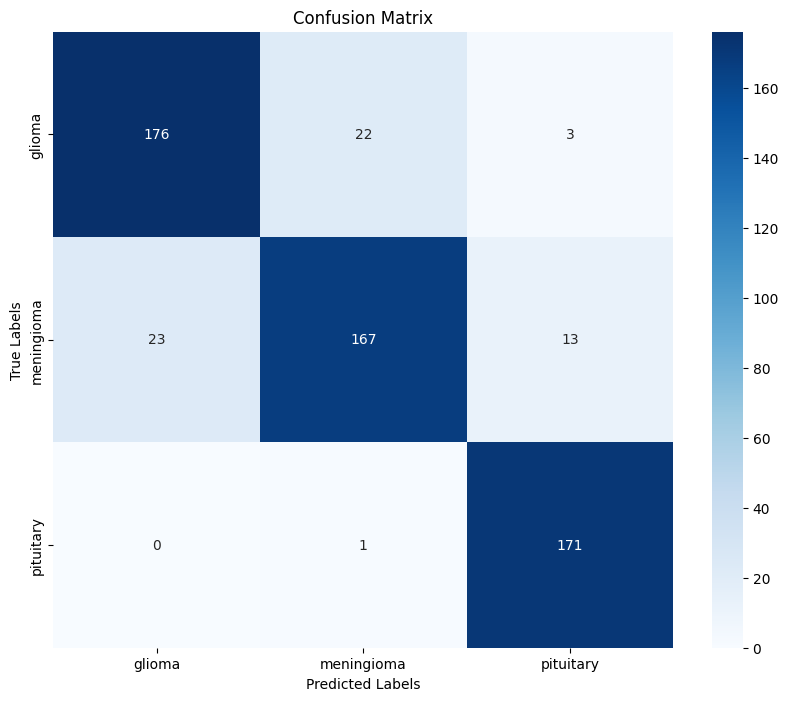

In [6]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns

# y_pred = loaded_model.predict(X_test)
# y_pred_classes = np.argmax(y_pred, axis=1)

# conf_matrix = confusion_matrix(y_test, y_pred_classes)

# plt.figure(figsize=(10, 8))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix')
# plt.show()


In [2]:
# import tensorflow as tf
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from keras.preprocessing.image import ImageDataGenerator
# from sklearn.model_selection import train_test_split
# from keras.regularizers import l2
# import numpy as np
# import os
# import cv2

# def create_cnn_model(input_shape, num_classes):
#     model = Sequential([
#         Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=l2(0.001)),
#         MaxPooling2D((2, 2)),
#         Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
#         MaxPooling2D((2, 2)),
#         Flatten(),
#         Dense(128, activation='relu', kernel_regularizer=l2(0.001)), 
#         Dropout(0.6),
#         Dense(num_classes, activation='softmax')
#     ])
#     model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     return model

# base_dir = 'C:/brain_tumor/version2/notebook/classify_dataset'
# gen_dir = 'C:/brain_tumor/version2/notebook/generated_dataset'
# class_names = ['glioma', 'meningioma', 'pituitary']

# X = []
# y = []
# X_generated = []
# y_generated = []

# for label, class_name in enumerate(class_names):
#     class_dir = os.path.join(base_dir, class_name)
#     gen_class_dir = os.path.join(gen_dir, class_name)
#     for img_name in os.listdir(class_dir):
#         img_path = os.path.join(class_dir, img_name)
#         img = cv2.imread(img_path)
#         img = cv2.resize(img, (128, 128))
#         X.append(img)
#         y.append(label)
#     for image_name in os.listdir(gen_class_dir):
#         image_path = os.path.join(gen_class_dir, image_name)
#         image = cv2.imread(image_path)
#         image = cv2.resize(image, (128, 128))
#         X_generated.append(image)
#         y_generated.append(label)

# X = np.array(X)
# y = np.array(y)
# X_generated = np.array(X_generated)
# y_generated = np.array(y_generated)
# from sklearn.model_selection import train_test_split
# import numpy as np

# X = X.astype('float32') / 255.0
# X_generated = X_generated.astype('float32') / 255.0

# # Split the original dataset into 80% for training and 20% for testing
# X_train_orig, X_test, y_train_orig, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Combine the generated dataset with the training portion of the original dataset
# X_train_combined = np.concatenate((X_train_orig, X_generated), axis=0)
# y_train_combined = np.concatenate((y_train_orig, y_generated), axis=0)

# # Shuffle the combined dataset
# shuffle_indices = np.random.permutation(len(X_train_combined))
# X_train_combined_shuffled = X_train_combined[shuffle_indices]
# y_train_combined_shuffled = y_train_combined[shuffle_indices]

# X_final, X_valid, y_final, y_valid = train_test_split(X_train_combined_shuffled, y_train_combined_shuffled, test_size=0.2, random_state=42)

# model1 = create_cnn_model(X_train_combined_shuffled.shape[1:], len(class_names))
# history1 = model1.fit(X_final, y_final, epochs=50, validation_data=(X_valid, y_valid), batch_size=4)
# test_loss1, test_acc1 = model1.evaluate(X_test, y_test)
# print(f"Test accuracy for Case-3(b): {test_acc1}")

Epoch 1/50
581/581 [==============================] - 10s 10ms/step - loss: 0.9211 - accuracy: 0.6461 - val_loss: 0.6664 - val_accuracy: 0.8141
Epoch 2/50
581/581 [==============================] - 6s 10ms/step - loss: 0.6865 - accuracy: 0.7757 - val_loss: 0.5687 - val_accuracy: 0.8451
Epoch 3/50
581/581 [==============================] - 6s 10ms/step - loss: 0.5783 - accuracy: 0.8261 - val_loss: 0.5089 - val_accuracy: 0.8399
Epoch 4/50
581/581 [==============================] - 6s 10ms/step - loss: 0.5124 - accuracy: 0.8545 - val_loss: 0.4772 - val_accuracy: 0.8623
Epoch 5/50
581/581 [==============================] - 6s 10ms/step - loss: 0.4735 - accuracy: 0.8743 - val_loss: 0.4586 - val_accuracy: 0.8709
Epoch 6/50
581/581 [==============================] - 6s 10ms/step - loss: 0.4403 - accuracy: 0.8876 - val_loss: 0.4522 - val_accuracy: 0.8812
Epoch 7/50
581/581 [==============================] - 6s 11ms/step - loss: 0.3950 - accuracy: 0.9044 - val_loss: 0.4663 - val_accuracy: 0.848

In [3]:
# model1.save("50e_cnn_model(case3b).h5")

In [4]:
# from keras.models import load_model

# loaded_model1 = load_model("50e_cnn_model(case3b).h5")

In [ ]:
# import matplotlib.pyplot as plt

# plt.plot(history1.history['loss'])
# plt.plot(history1.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.show()

# plt.plot(history1.history['accuracy'])
# plt.plot(history1.history['val_accuracy'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.show()


18/18 [==============================] - 0s 23ms/step


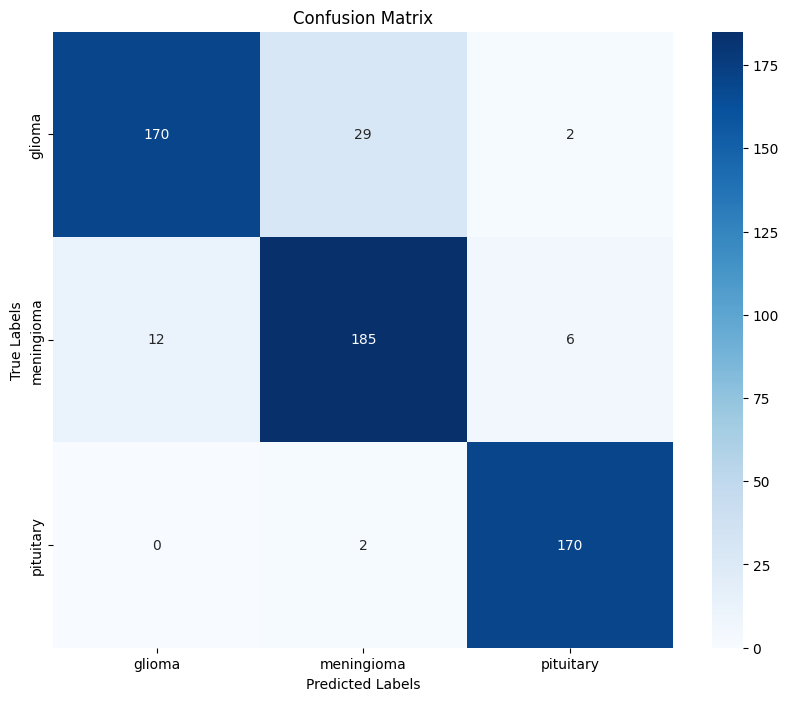

In [6]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns

# y_pred = loaded_model1.predict(X_test)
# y_pred_classes = np.argmax(y_pred, axis=1)

# conf_matrix = confusion_matrix(y_test, y_pred_classes)

# plt.figure(figsize=(10, 8))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix')
# plt.show()


In [2]:
# import os
# import cv2
# import numpy as np
# from sklearn.model_selection import train_test_split
# from keras.preprocessing.image import ImageDataGenerator
# import tensorflow as tf
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from keras.regularizers import l2

# def create_cnn_model(input_shape, num_classes):
#     model = Sequential([
#         Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=l2(0.001)),
#         MaxPooling2D((2, 2)),
#         Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
#         MaxPooling2D((2, 2)),
#         Flatten(),
#         Dense(128, activation='relu', kernel_regularizer=l2(0.001)), 
#         Dropout(0.6),
#         Dense(num_classes, activation='softmax')
#     ])
#     model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     return model

# base_dir = 'C:/brain_tumor/version2/notebook/classify_dataset'
# class_names = ['glioma', 'meningioma', 'pituitary']

# X = []
# y = []

# for label, class_name in enumerate(class_names):
#     class_dir = os.path.join(base_dir, class_name)
#     for img_name in os.listdir(class_dir):
#         img_path = os.path.join(class_dir, img_name)
#         img = cv2.imread(img_path)
#         img = cv2.resize(img, (128, 128))
#         X.append(img)
#         y.append(label)

# X = np.array(X)
# y = np.array(y)

# X = X.astype('float32') / 255.0

# datagen = ImageDataGenerator(horizontal_flip=True, height_shift_range=0.2, zoom_range=0.2)
# X_augmented, y_augmented = [], []

# # Generate 100 augmented images for each class
# for class_idx in np.unique(y):
#     class_images = X[y == class_idx]
#     class_labels = y[y == class_idx]
#     augmented_images, augmented_labels = [], []

#     batch = np.repeat(class_images, np.ceil(100 / len(class_images)), axis=0)[:100]
#     labels_batch = np.array([class_idx] * 100)
    
#     augmented_images = datagen.flow(batch, labels_batch, batch_size=1, shuffle=False)
    
#     for i in range(100):
#         aug_img, aug_label = augmented_images.next()
#         X_augmented.append(aug_img[0])
#         y_augmented.append(aug_label[0])

# X_augmented = np.array(X_augmented)
# y_augmented = np.array(y_augmented)

# X_combined = np.concatenate((X, X_augmented), axis=0)
# y_combined = np.concatenate((y, y_augmented), axis=0)

# X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=len(y) * 0.2 / len(y_combined), random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# model = create_cnn_model(X_train.shape[1:], len(class_names))
# history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), batch_size=4)
# test_loss, test_acc = model.evaluate(X_test, y_test)
# print(f"Test accuracy for Case 2: {test_acc}")

# # Save the trained model
# # model.save("case_3c_trained_model.h5")


Epoch 1/50
521/521 [==============================] - 9s 10ms/step - loss: 1.0198 - accuracy: 0.5799 - val_loss: 0.8396 - val_accuracy: 0.6737
Epoch 2/50
521/521 [==============================] - 5s 10ms/step - loss: 0.7939 - accuracy: 0.7019 - val_loss: 0.7074 - val_accuracy: 0.7716
Epoch 3/50
521/521 [==============================] - 5s 10ms/step - loss: 0.6864 - accuracy: 0.7480 - val_loss: 0.6230 - val_accuracy: 0.7658
Epoch 4/50
521/521 [==============================] - 5s 10ms/step - loss: 0.6256 - accuracy: 0.7758 - val_loss: 0.6060 - val_accuracy: 0.7985
Epoch 5/50
521/521 [==============================] - 5s 10ms/step - loss: 0.5754 - accuracy: 0.8108 - val_loss: 0.5722 - val_accuracy: 0.8330
Epoch 6/50
521/521 [==============================] - 6s 11ms/step - loss: 0.5461 - accuracy: 0.8262 - val_loss: 0.5496 - val_accuracy: 0.8311
Epoch 7/50
521/521 [==============================] - 5s 10ms/step - loss: 0.5190 - accuracy: 0.8397 - val_loss: 0.5526 - val_accuracy: 0.8330

In [3]:

# model.save("50e_cnn_model(case3c).h5")

In [4]:
# from keras.models import load_model

# loaded_model = load_model("50e_cnn_model(case3c).h5")

18/18 [==============================] - 0s 18ms/step


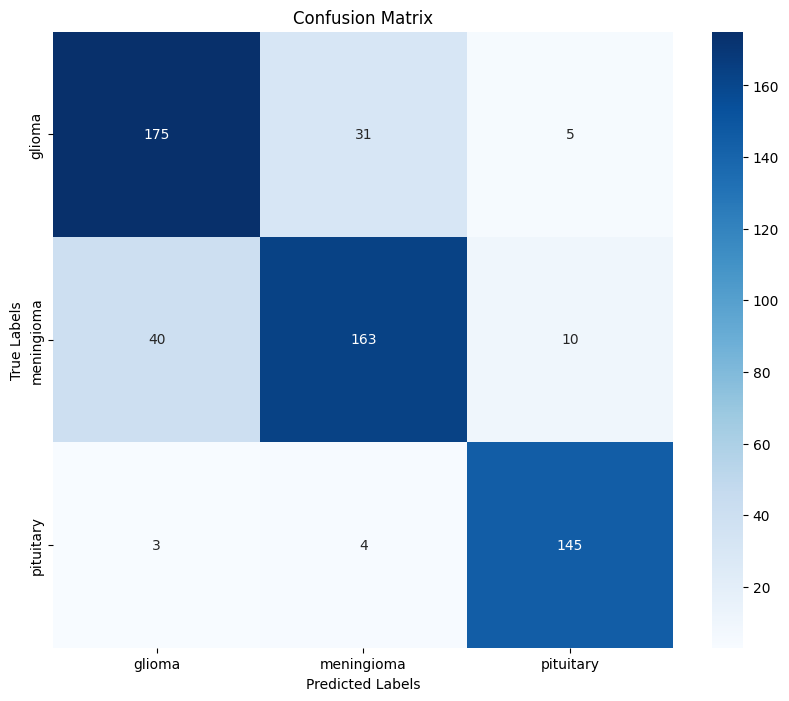

In [6]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns

# y_pred = loaded_model.predict(X_test)
# y_pred_classes = np.argmax(y_pred, axis=1)

# conf_matrix = confusion_matrix(y_test, y_pred_classes)

# plt.figure(figsize=(10, 8))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix')
# plt.show()


In [3]:
# import os
# import cv2
# import numpy as np
# from sklearn.model_selection import train_test_split
# from keras.preprocessing.image import ImageDataGenerator
# import tensorflow as tf
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from keras.regularizers import l2

# def create_cnn_model(input_shape, num_classes):
#     model = Sequential([
#         Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=l2(0.001)),
#         MaxPooling2D((2, 2)),
#         Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
#         MaxPooling2D((2, 2)),
#         Flatten(),
#         Dense(128, activation='relu', kernel_regularizer=l2(0.001)),  
#         Dropout(0.6),
#         Dense(num_classes, activation='softmax')
#     ])
#     model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     return model

# base_dir = 'C:/brain_tumor/version2/notebook/classify_dataset'
# class_names = ['glioma', 'meningioma', 'pituitary']

# X = []
# y = []

# for label, class_name in enumerate(class_names):
#     class_dir = os.path.join(base_dir, class_name)
#     for img_name in os.listdir(class_dir):
#         img_path = os.path.join(class_dir, img_name)
#         img = cv2.imread(img_path)
#         img = cv2.resize(img, (128, 128))
#         X.append(img)
#         y.append(label)

# X = np.array(X)
# y = np.array(y)

# X = X.astype('float32') / 255.0

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# datagen = ImageDataGenerator(horizontal_flip=True, height_shift_range=0.2, zoom_range=0.2)

# # Generate 200 augmented images for each class
# X_augmented = []
# y_augmented = []
# for class_name in class_names:
#     class_idx = class_names.index(class_name)
#     class_images = X_train[y_train == class_idx]
#     class_labels = y_train[y_train == class_idx]
    
#     augmented_images = datagen.flow(class_images, class_labels, batch_size=1, shuffle=False)
    
#     for _ in range(200):
#         aug_img, aug_label = augmented_images.next()
#         X_augmented.append(aug_img[0])
#         y_augmented.append(aug_label[0])

# X_augmented = np.array(X_augmented)
# y_augmented = np.array(y_augmented)

# X_combined = np.concatenate((X_train, X_augmented), axis=0)
# y_combined = np.concatenate((y_train, y_augmented), axis=0)

# X_final, X_val, y_final, y_val = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

# model = create_cnn_model(X_train.shape[1:], len(class_names))
# history = model.fit(X_final, y_final, epochs=50, validation_data=(X_val, y_val), batch_size=4)
# test_loss, test_acc = model.evaluate(X_test, y_test)
# print(f"Test accuracy for Case-3(c): {test_acc}")

# # Save the trained model
# # model.save("case_3c_trained_model.h5")


Epoch 1/50
581/581 [==============================] - 9s 10ms/step - loss: 1.0026 - accuracy: 0.5652 - val_loss: 0.8164 - val_accuracy: 0.7160
Epoch 2/50
581/581 [==============================] - 6s 10ms/step - loss: 0.7816 - accuracy: 0.7034 - val_loss: 0.6761 - val_accuracy: 0.7694
Epoch 3/50
581/581 [==============================] - 6s 10ms/step - loss: 0.6805 - accuracy: 0.7551 - val_loss: 0.6364 - val_accuracy: 0.7642
Epoch 4/50
581/581 [==============================] - 6s 10ms/step - loss: 0.6268 - accuracy: 0.7865 - val_loss: 0.6097 - val_accuracy: 0.8055
Epoch 5/50
581/581 [==============================] - 6s 10ms/step - loss: 0.5816 - accuracy: 0.8132 - val_loss: 0.6226 - val_accuracy: 0.8193
Epoch 6/50
581/581 [==============================] - 6s 10ms/step - loss: 0.5534 - accuracy: 0.8235 - val_loss: 0.5745 - val_accuracy: 0.8227
Epoch 7/50
581/581 [==============================] - 6s 10ms/step - loss: 0.5108 - accuracy: 0.8450 - val_loss: 0.5936 - val_accuracy: 0.8038

In [5]:
# model.save('50e_cnn_model_2(case3c_90_accuracy).h5')

In [6]:
# from keras.models import load_model

# loaded_model = load_model("50e_cnn_model_2(case3c_90_accuracy).h5")

18/18 [==============================] - 0s 23ms/step


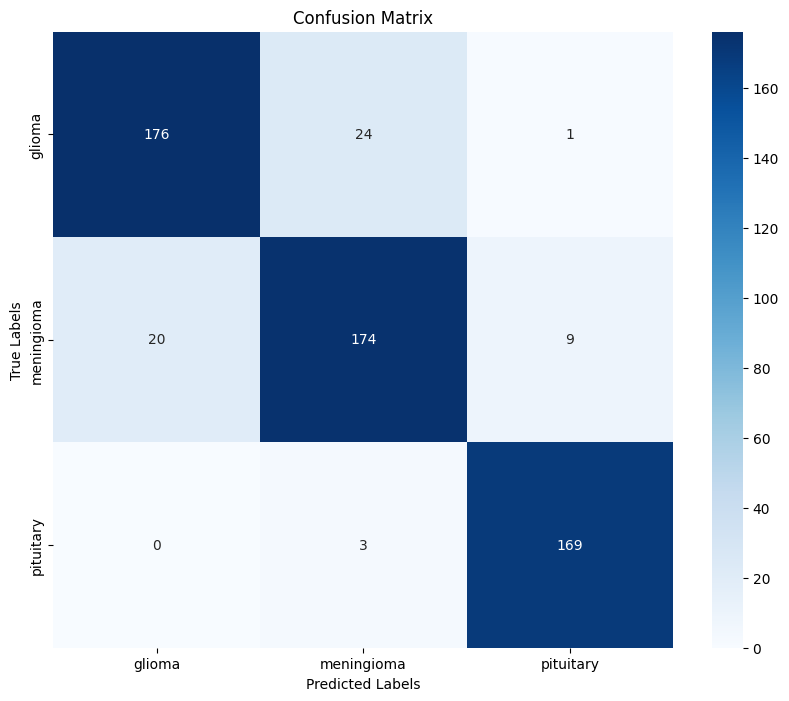

In [8]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns

# y_pred = loaded_model.predict(X_test)
# y_pred_classes = np.argmax(y_pred, axis=1)

# conf_matrix = confusion_matrix(y_test, y_pred_classes)

# plt.figure(figsize=(10, 8))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix')
# plt.show()


In [3]:
# import tensorflow as tf
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from keras.preprocessing.image import ImageDataGenerator
# from sklearn.model_selection import train_test_split
# from keras.regularizers import l2
# import numpy as np
# import os
# import cv2

# def create_cnn_model(input_shape, num_classes):
#     model = Sequential([
#         Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=l2(0.001)),
#         MaxPooling2D((2, 2)),
#         Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
#         MaxPooling2D((2, 2)),
#         Flatten(),
#         Dense(128, activation='relu', kernel_regularizer=l2(0.001)), 
#         Dropout(0.7),
#         Dense(num_classes, activation='softmax')
#     ])
#     model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     return model

# base_dir = 'C:/brain_tumor/version2/notebook/classify_dataset'
# class_names = ['glioma', 'meningioma', 'pituitary']

# X = []
# y = []

# for label, class_name in enumerate(class_names):
#     class_dir = os.path.join(base_dir, class_name)
#     for img_name in os.listdir(class_dir):
#         img_path = os.path.join(class_dir, img_name)
#         img = cv2.imread(img_path)
#         img = cv2.resize(img, (128, 128))
#         X.append(img)
#         y.append(label)

# X = np.array(X)
# y = np.array(y)

# X = X.astype('float32') / 255.0

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# model = create_cnn_model(X_train.shape[1:], len(class_names))
# history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), batch_size=4)
# test_loss, test_acc = model.evaluate(X_test, y_test)
# print(f"Test accuracy for Case 1: {test_acc}")


Epoch 1/50
519/519 [==============================] - 5s 9ms/step - loss: 1.1682 - accuracy: 0.5591 - val_loss: 1.0274 - val_accuracy: 0.6455
Epoch 2/50
519/519 [==============================] - 5s 9ms/step - loss: 1.0122 - accuracy: 0.6257 - val_loss: 0.9400 - val_accuracy: 0.6840
Epoch 3/50
519/519 [==============================] - 5s 9ms/step - loss: 0.9167 - accuracy: 0.6860 - val_loss: 0.8440 - val_accuracy: 0.7187
Epoch 4/50
519/519 [==============================] - 5s 9ms/step - loss: 0.8570 - accuracy: 0.7130 - val_loss: 0.7712 - val_accuracy: 0.7938
Epoch 5/50
519/519 [==============================] - 5s 9ms/step - loss: 0.8015 - accuracy: 0.7376 - val_loss: 0.7508 - val_accuracy: 0.7534
Epoch 6/50
519/519 [==============================] - 5s 9ms/step - loss: 0.7758 - accuracy: 0.7506 - val_loss: 0.7007 - val_accuracy: 0.7842
Epoch 7/50
519/519 [==============================] - 5s 9ms/step - loss: 0.7458 - accuracy: 0.7665 - val_loss: 0.6988 - val_accuracy: 0.7765
Epoch 

In [7]:
# import tensorflow as tf
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from keras.preprocessing.image import ImageDataGenerator
# from sklearn.model_selection import train_test_split
# from keras.regularizers import l2
# import numpy as np
# import os
# import cv2

# def create_cnn_model(input_shape, num_classes):
#     model = Sequential([
#         Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=l2(0.001)),
#         MaxPooling2D((2, 2)),
#         Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
#         MaxPooling2D((2, 2)),
#         Flatten(),
#         Dense(128, activation='relu', kernel_regularizer=l2(0.001)), 
#         Dropout(0.8),
#         Dense(num_classes, activation='softmax')
#     ])
#     model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     return model

# base_dir = 'C:/brain_tumor/version2/notebook/classify_dataset'
# class_names = ['glioma', 'meningioma', 'pituitary']

# X = []
# y = []

# for label, class_name in enumerate(class_names):
#     class_dir = os.path.join(base_dir, class_name)
#     for img_name in os.listdir(class_dir):
#         img_path = os.path.join(class_dir, img_name)
#         img = cv2.imread(img_path)
#         img = cv2.resize(img, (128, 128))
#         X.append(img)
#         y.append(label)

# X = np.array(X)
# y = np.array(y)

# X = X.astype('float32') / 255.0

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# model = create_cnn_model(X_train.shape[1:], len(class_names))
# history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size=4)
# test_loss, test_acc = model.evaluate(X_test, y_test)
# print(f"Test accuracy for Case 1: {test_acc}")


Epoch 1/100
519/519 [==============================] - 5s 9ms/step - loss: 1.2097 - accuracy: 0.5133 - val_loss: 1.0581 - val_accuracy: 0.6551
Epoch 2/100
519/519 [==============================] - 5s 9ms/step - loss: 1.0612 - accuracy: 0.6030 - val_loss: 0.9919 - val_accuracy: 0.6647
Epoch 3/100
519/519 [==============================] - 5s 9ms/step - loss: 0.9847 - accuracy: 0.6319 - val_loss: 0.8886 - val_accuracy: 0.7303
Epoch 4/100
519/519 [==============================] - 5s 9ms/step - loss: 0.9330 - accuracy: 0.6753 - val_loss: 0.8343 - val_accuracy: 0.7688
Epoch 5/100
519/519 [==============================] - 5s 9ms/step - loss: 0.8907 - accuracy: 0.6932 - val_loss: 0.7809 - val_accuracy: 0.7900
Epoch 6/100
519/519 [==============================] - 5s 9ms/step - loss: 0.8451 - accuracy: 0.7250 - val_loss: 0.7666 - val_accuracy: 0.8073
Epoch 7/100
519/519 [==============================] - 5s 10ms/step - loss: 0.8160 - accuracy: 0.7313 - val_loss: 0.7301 - val_accuracy: 0.797

In [2]:
# import tensorflow as tf
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from keras.preprocessing.image import ImageDataGenerator
# from sklearn.model_selection import train_test_split
# from keras.regularizers import l2
# import numpy as np
# import os
# import cv2

# def create_cnn_model(input_shape, num_classes):
#     model = Sequential([
#         Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=l2(0.001)),
#         MaxPooling2D((2, 2)),
#         Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
#         MaxPooling2D((2, 2)),
#         Flatten(),
#         Dense(128, activation='relu', kernel_regularizer=l2(0.001)), 
#         Dropout(0.6),
#         Dense(num_classes, activation='softmax')
#     ])
#     model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     return model

# base_dir = 'C:/brain_tumor/version2/notebook/Training'
# class_names = ['glioma', 'meningioma', 'pituitary']

# X = []
# y = []

# for label, class_name in enumerate(class_names):
#     class_dir = os.path.join(base_dir, class_name)
#     for img_name in os.listdir(class_dir):
#         img_path = os.path.join(class_dir, img_name)
#         img = cv2.imread(img_path)
#         img = cv2.resize(img, (128, 128))
#         X.append(img)
#         y.append(label)

# X = np.array(X)
# y = np.array(y)

# X = X.astype('float32') / 255.0

# # Case 1 Original Images
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# model = create_cnn_model(X_train.shape[1:], len(class_names))
# history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), batch_size=4)
# # test_loss, test_acc = model.evaluate(X_test, y_test)
# # print(f"Test accuracy for Case 1: {test_acc}")


Epoch 1/50
824/824 [==============================] - 31s 9ms/step - loss: 1.0894 - accuracy: 0.6058 - val_loss: 0.9417 - val_accuracy: 0.6723
Epoch 2/50
824/824 [==============================] - 7s 9ms/step - loss: 0.8806 - accuracy: 0.6960 - val_loss: 0.8158 - val_accuracy: 0.7451
Epoch 3/50
824/824 [==============================] - 7s 8ms/step - loss: 0.7847 - accuracy: 0.7446 - val_loss: 0.7337 - val_accuracy: 0.7791
Epoch 4/50
824/824 [==============================] - 7s 8ms/step - loss: 0.7169 - accuracy: 0.7856 - val_loss: 0.6947 - val_accuracy: 0.7706
Epoch 5/50
824/824 [==============================] - 7s 9ms/step - loss: 0.6646 - accuracy: 0.8023 - val_loss: 0.6480 - val_accuracy: 0.8228
Epoch 6/50
824/824 [==============================] - 7s 9ms/step - loss: 0.6357 - accuracy: 0.8224 - val_loss: 0.6107 - val_accuracy: 0.8459
Epoch 7/50
824/824 [==============================] - 7s 9ms/step - loss: 0.6036 - accuracy: 0.8224 - val_loss: 0.5938 - val_accuracy: 0.8447
Epoch

NameError: name 'X_test' is not defined

In [3]:
# model.save('cnn_case_1.h5')

In [ ]:
# import matplotlib.pyplot as plt

# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.show()

# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.show()


In [ ]:
# base_dir = 'C:/brain_tumor/version2/notebook/Testing'
# class_names = ['glioma', 'meningioma', 'pituitary']

# X = []
# y = []

# for label, class_name in enumerate(class_names):
#     class_dir = os.path.join(base_dir, class_name)
#     for img_name in os.listdir(class_dir):
#         img_path = os.path.join(class_dir, img_name)
#         img = cv2.imread(img_path)
#         img = cv2.resize(img, (128, 128))
#         X.append(img)
#         y.append(label)

# X = np.array(X)
# y = np.array(y)

# X = X.astype('float32') / 255.0
# test_loss, test_acc = model.evaluate(X, y)
# print(f"Test accuracy for Case-3(a): {test_acc}")

In [2]:
# import os
# import cv2
# import numpy as np
# from sklearn.model_selection import train_test_split
# from keras.preprocessing.image import ImageDataGenerator
# import tensorflow as tf
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from keras.regularizers import l2

# def create_cnn_model(input_shape, num_classes):
#     model = Sequential([
#         Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=l2(0.001)),
#         MaxPooling2D((2, 2)),
#         Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
#         MaxPooling2D((2, 2)),
#         Flatten(),
#         Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
#         Dropout(0.6),
#         Dense(num_classes, activation='softmax')
#     ])
#     model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     return model

# base_dir = 'C:/brain_tumor/version2/notebook/Training'
# class_names = ['glioma', 'meningioma', 'pituitary']

# X = []
# y = []

# for label, class_name in enumerate(class_names):
#     class_dir = os.path.join(base_dir, class_name)
#     for img_name in os.listdir(class_dir):
#         img_path = os.path.join(class_dir, img_name)
#         img = cv2.imread(img_path)
#         img = cv2.resize(img, (128, 128))
#         X.append(img)
#         y.append(label)

# X = np.array(X)
# y = np.array(y)

# X = X.astype('float32') / 255.0

# # Data augmentation setup
# datagen = ImageDataGenerator(horizontal_flip=True, height_shift_range=0.2, zoom_range=0.2)

# # Generate 200 augmented images for each class
# X_augmented = []
# y_augmented = []
# for class_name in class_names:
#     class_idx = class_names.index(class_name)
#     class_images = X[y == class_idx]
#     class_labels = y[y == class_idx]
    
#     augmented_images = datagen.flow(class_images, class_labels, batch_size=1, shuffle=False)
    
#     for _ in range(200):
#         aug_img, aug_label = augmented_images.next()
#         X_augmented.append(aug_img[0])
#         y_augmented.append(aug_label[0])

# X_augmented = np.array(X_augmented)
# y_augmented = np.array(y_augmented)

# X_combined = np.concatenate((X, X_augmented), axis=0)
# y_combined = np.concatenate((y, y_augmented), axis=0)

# X_final, X_val, y_final, y_val = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

# model = create_cnn_model(X_final.shape[1:], len(class_names))
# history = model.fit(X_final, y_final, epochs=50, validation_data=(X_val, y_val), batch_size=4)


Epoch 1/50
944/944 [==============================] - 14s 9ms/step - loss: 0.9395 - accuracy: 0.6303 - val_loss: 0.6980 - val_accuracy: 0.7797
Epoch 2/50
944/944 [==============================] - 8s 8ms/step - loss: 0.7136 - accuracy: 0.7461 - val_loss: 0.5849 - val_accuracy: 0.8178
Epoch 3/50
944/944 [==============================] - 8s 9ms/step - loss: 0.6145 - accuracy: 0.7935 - val_loss: 0.5773 - val_accuracy: 0.8072
Epoch 4/50
944/944 [==============================] - 8s 9ms/step - loss: 0.5792 - accuracy: 0.8094 - val_loss: 0.4951 - val_accuracy: 0.8549
Epoch 5/50
944/944 [==============================] - 8s 9ms/step - loss: 0.5366 - accuracy: 0.8338 - val_loss: 0.4866 - val_accuracy: 0.8538
Epoch 6/50
944/944 [==============================] - 9s 9ms/step - loss: 0.5018 - accuracy: 0.8534 - val_loss: 0.4514 - val_accuracy: 0.8633
Epoch 7/50
944/944 [==============================] - 9s 9ms/step - loss: 0.4802 - accuracy: 0.8614 - val_loss: 0.4966 - val_accuracy: 0.8326
Epoch

In [3]:
# model.save('cnn_case_2.h5')

In [ ]:
# import matplotlib.pyplot as plt

# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.show()

# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.show()


In [2]:
# import tensorflow as tf
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from keras.preprocessing.image import ImageDataGenerator
# from sklearn.model_selection import train_test_split
# from keras.regularizers import l2
# import numpy as np
# import os
# import cv2

# def create_cnn_model(input_shape, num_classes):
#     model = Sequential([
#         Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=l2(0.001)),
#         MaxPooling2D((2, 2)),
#         Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
#         MaxPooling2D((2, 2)),
#         Flatten(),
#         Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
#         Dropout(0.6),
#         Dense(num_classes, activation='softmax')
#     ])
#     model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     return model

# base_dir = 'C:/brain_tumor/version2/notebook/Training'
# gen_dir = 'C:/brain_tumor/version2/notebook/generated_dataset'
# class_names = ['glioma', 'meningioma', 'pituitary']

# X = []
# y = []
# X_generated = []
# y_generated = []

# for label, class_name in enumerate(class_names):
#     class_dir = os.path.join(base_dir, class_name)
#     gen_class_dir = os.path.join(gen_dir, class_name)
#     for img_name in os.listdir(class_dir):
#         img_path = os.path.join(class_dir, img_name)
#         img = cv2.imread(img_path)
#         img = cv2.resize(img, (128, 128))
#         X.append(img)
#         y.append(label)
#     for image_name in os.listdir(gen_class_dir):
#         image_path = os.path.join(gen_class_dir, image_name)
#         image = cv2.imread(image_path)
#         image = cv2.resize(image, (128, 128))
#         X_generated.append(image)
#         y_generated.append(label)

# X = np.array(X)
# y = np.array(y)
# X_generated = np.array(X_generated)
# y_generated = np.array(y_generated)
# from sklearn.model_selection import train_test_split
# import numpy as np

# X = X.astype('float32') / 255.0
# X_generated = X_generated.astype('float32') / 255.0

# X_train_combined = np.concatenate((X, X_generated), axis=0)
# y_train_combined = np.concatenate((y, y_generated), axis=0)

# # Shuffle the combined dataset
# shuffle_indices = np.random.permutation(len(X_train_combined))
# X_train_combined_shuffled = X_train_combined[shuffle_indices]
# y_train_combined_shuffled = y_train_combined[shuffle_indices]

# X_final, X_valid, y_final, y_valid = train_test_split(X_train_combined_shuffled, y_train_combined_shuffled, test_size=0.2, random_state=42)

# model1 = create_cnn_model(X_train_combined_shuffled.shape[1:], len(class_names))
# history1 = model1.fit(X_final, y_final, epochs=50, validation_data=(X_valid, y_valid), batch_size=4)

Epoch 1/50
944/944 [==============================] - 12s 9ms/step - loss: 0.8680 - accuracy: 0.6684 - val_loss: 0.6447 - val_accuracy: 0.7691
Epoch 2/50
944/944 [==============================] - 8s 9ms/step - loss: 0.6278 - accuracy: 0.7874 - val_loss: 0.5115 - val_accuracy: 0.8549
Epoch 3/50
944/944 [==============================] - 8s 9ms/step - loss: 0.5242 - accuracy: 0.8391 - val_loss: 0.4745 - val_accuracy: 0.8761
Epoch 4/50
944/944 [==============================] - 9s 9ms/step - loss: 0.4681 - accuracy: 0.8646 - val_loss: 0.4598 - val_accuracy: 0.8665
Epoch 5/50
944/944 [==============================] - 9s 9ms/step - loss: 0.4423 - accuracy: 0.8738 - val_loss: 0.4239 - val_accuracy: 0.8941
Epoch 6/50
944/944 [==============================] - 9s 10ms/step - loss: 0.4124 - accuracy: 0.8905 - val_loss: 0.4018 - val_accuracy: 0.8941
Epoch 7/50
944/944 [==============================] - 9s 9ms/step - loss: 0.3841 - accuracy: 0.9049 - val_loss: 0.4348 - val_accuracy: 0.8676
Epoc

In [3]:
# model1.save('cnn_case_3.h5')

In [ ]:
# import matplotlib.pyplot as plt

# plt.plot(history1.history['loss'])
# plt.plot(history1.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.show()

# plt.plot(history1.history['accuracy'])
# plt.plot(history1.history['val_accuracy'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.show()


Accuracy on test set

In [4]:
# from keras.models import load_model

# loaded_model = load_model("inception_case_3.h5")
# base_dir = 'C:/brain_tumor/version2/notebook/Testing'
# class_names = ['glioma', 'meningioma', 'pituitary']

# X = []
# y = []

# for label, class_name in enumerate(class_names):
#     class_dir = os.path.join(base_dir, class_name)
#     for img_name in os.listdir(class_dir):
#         img_path = os.path.join(class_dir, img_name)
#         img = cv2.imread(img_path)
#         img = cv2.resize(img, (128, 128))
#         X.append(img)
#         y.append(label)

# X = np.array(X)
# y = np.array(y)

# X = X.astype('float32') / 255.0
# test_loss, test_acc = loaded_model.evaluate(X, y)
# print(f"Test accuracy: {test_acc}")

29/29 [==============================] - 1s 13ms/step - loss: 0.2830 - accuracy: 0.9581
Test accuracy: 0.9580574035644531


Classify 1 img

In [7]:
# from keras.models import load_model
# import numpy as np
# from keras.preprocessing import image
# import cv2

# model = load_model('cnn_case_1.h5')

# new_image_path = 'C:/brain_tumor/version2/classify_dataset/meningioma/meni (8).jpg'
# img = cv2.imread(new_image_path)
# img = cv2.resize(img, (128, 128))
# img = np.array(img)
# img = img.astype('float32') / 255.0
# img = np.expand_dims(img, axis=0)

# predictions = model.predict(img)
# predicted_class = np.argmax(predictions, axis=1)

# class_labels = ['glioma', 'meningioma', 'pituitary']

# predicted_label = class_labels[predicted_class[0]]
# print(f'The predicted tumor type is: {predicted_label}')


1/1 [==============================] - 0s 78ms/step
The predicted tumor type is: meningioma


Ensemble model

In [2]:
# from keras.models import load_model
# from sklearn.metrics import accuracy_score
# import os
# import cv2
# import numpy as np
# import pandas as pd

# base_dir = 'C:/brain_tumor/version2/notebook/Testing'
# class_names = ['glioma', 'meningioma', 'pituitary']

# X = []
# y = []

# for label, class_name in enumerate(class_names):
#     class_dir = os.path.join(base_dir, class_name)
#     for img_name in os.listdir(class_dir):
#         img_path = os.path.join(class_dir, img_name)
#         img = cv2.imread(img_path)
#         img = cv2.resize(img, (128, 128))
#         X.append(img)
#         y.append(label)

# X = np.array(X)
# y = np.array(y)

# X = X.astype('float32') / 255.0

# model1 = load_model('cnn_case_3.h5')
# model2 = load_model('resnet_case_3.h5')
# model3 = load_model('inception_case_3.h5')

# models = [model1, model2, model3]
# preds1 = [model.predict(X) for model in models]
# preds1 = np.array(preds1)

# df = pd.DataFrame([])

# for w1 in range(0, 5):
#     for w2 in range(0, 5):
#         for w3 in range(0, 5):
#             wts = [w1/10., w2/10., w3/10.]
#             wted_preds1 = np.tensordot(preds1, wts, axes=((0), (0)))
#             wted_ensemble_pred = np.argmax(wted_preds1, axis=1)
#             weighted_accuracy = accuracy_score(y, wted_ensemble_pred)
#             df = pd.concat([df, pd.DataFrame({'wt1': [wts[0]], 'wt2': [wts[1]], 
#                                               'wt3': [wts[2]], 'acc': [weighted_accuracy*100]})], ignore_index=True)

# max_acc_row = df.iloc[df['acc'].idxmax()]
# print("Max accuracy of ", max_acc_row['acc'], " obtained with w1=", max_acc_row['wt1'],
#       " w2=", max_acc_row['wt2'], " and w3=", max_acc_row['wt3'])


29/29 [==============================] - 0s 6ms/step
Max accuracy of  96.90949227373068  obtained with w1= 0.1  w2= 0.2  and w3= 0.1


In [3]:
# df_sorted = df.sort_values(by='acc', ascending=False)
# print(df_sorted)

     wt1  wt2  wt3        acc
73   0.2  0.4  0.3  96.909492
42   0.1  0.3  0.2  96.909492
67   0.2  0.3  0.2  96.909492
36   0.1  0.2  0.1  96.909492
72   0.2  0.4  0.2  96.909492
..   ...  ...  ...        ...
50   0.2  0.0  0.0  94.039735
25   0.1  0.0  0.0  94.039735
75   0.3  0.0  0.0  94.039735
100  0.4  0.0  0.0  94.039735
0    0.0  0.0  0.0  33.112583

[125 rows x 4 columns]


Ensemble model classify 1 img

In [4]:
# from keras.models import load_model
# import numpy as np
# import cv2

# model1 = load_model('cnn_case_3.h5')
# model2 = load_model('resnet_case_3.h5')
# model3 = load_model('inception_case_3.h5')

# w1, w2, w3 = 0.2, 0.4, 0.3  

# new_image_path = 'C:/brain_tumor/version2/classify_dataset/meningioma/meni (8).jpg'
# img = cv2.imread(new_image_path)
# img = cv2.resize(img, (128, 128))
# img = np.array(img)
# img = img.astype('float32') / 255.0
# img = np.expand_dims(img, axis=0)

# pred1 = model1.predict(img)
# pred2 = model2.predict(img)
# pred3 = model3.predict(img)

# combined_pred = (w1 * pred1) + (w2 * pred2) + (w3 * pred3)

# final_class = np.argmax(combined_pred, axis=1)

# class_labels = ['glioma', 'meningioma', 'pituitary']

# predicted_label = class_labels[final_class[0]]
# print(f'The predicted tumor type is: {predicted_label}')


1/1 [==============================] - 0s 47ms/step
The predicted tumor type is: meningioma
